In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as mtp
from pandas.plotting import parallel_coordinates

%matplotlib inline


In [3]:
ds = pd.read_csv('./Weather Data in India from 1901 to 2017.csv')
ds.shape

(117, 14)

In [3]:
ds.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [4]:
ds.isnull().sum()


Unnamed: 0    0
YEAR          0
JAN           0
FEB           0
MAR           0
APR           0
MAY           0
JUN           0
JUL           0
AUG           0
SEP           0
OCT           0
NOV           0
DEC           0
dtype: int64

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
Unnamed: 0    117 non-null int64
YEAR          117 non-null int64
JAN           117 non-null float64
FEB           117 non-null float64
MAR           117 non-null float64
APR           117 non-null float64
MAY           117 non-null float64
JUN           117 non-null float64
JUL           117 non-null float64
AUG           117 non-null float64
SEP           117 non-null float64
OCT           117 non-null float64
NOV           117 non-null float64
DEC           117 non-null float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [12]:
feature_cols = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
slct_df = ds[feature_cols]
X = StandardScaler().fit_transform(slct_df)

In [14]:
kmeans = KMeans(n_clusters=4)  
model = kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [15]:
centers = model.cluster_centers_
centers

array([[-0.81770652, -0.4156277 , -0.42130711, -0.32880454, -0.32512462,
        -0.24896452, -0.54947076, -0.51850324, -0.61579233, -0.64990771,
        -0.66539704, -0.78908231, -0.73880228],
       [ 0.14804394, -0.12583751, -0.13940673, -0.21206103, -0.22725711,
        -0.13738234,  0.15445467, -0.08099396, -0.03798866,  0.00579942,
         0.0470684 ,  0.11163797,  0.12915226],
       [ 1.70250529,  3.82042732,  3.5582444 ,  3.09709983,  3.81378275,
         3.19915243,  2.7670643 ,  2.54259982,  3.46855635,  4.07209833,
         4.07131009,  3.39569992,  3.95879744],
       [ 1.23327037,  0.76331891,  0.82427167,  0.81749392,  0.77738528,
         0.49935795,  0.58002336,  0.99692091,  1.03107028,  0.96263009,
         0.91360707,  1.09877219,  0.91279395]])

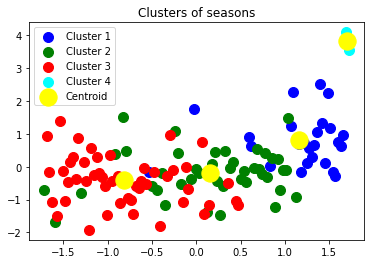

In [11]:
mtp.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(X[y_kmeans== 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of seasons')  
mtp.legend()  
mtp.show()  